In [ ]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [12]:
#dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [13]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [15]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [16]:
# reflect an existing database into a new model
database = automap_base()
# reflect the tables
database.prepare(engine, reflect=True)

In [17]:
# We can view all of the classes that automap found
database.classes.keys()

['measurement', 'station']

In [18]:
# Save references to each table
Measurement = database.classes.measurement
Station = database.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
    #Last Date in Data is 08-23-2017
# Perform a query to retrieve the data and precipitation scores
precipinfo = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
       group_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
    #create DF
precip_df = pd.DataFrame(precipinfo)
precip_df.head()
# Sort the dataframe by date
    #set index as date
precip_date= precip_df.set_index("date")
precip_date.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


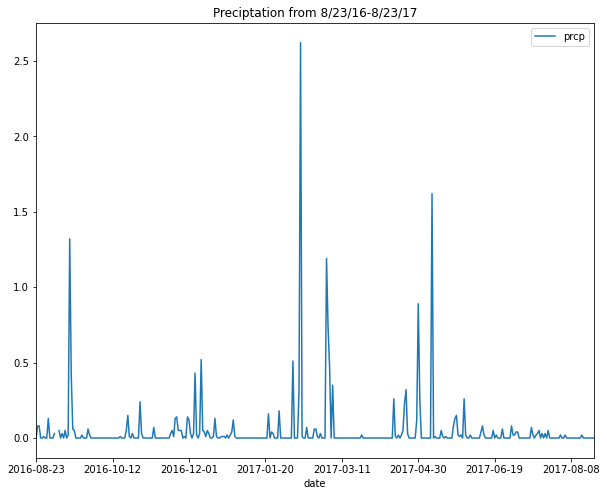

<Figure size 432x288 with 0 Axes>

In [40]:
# Use Pandas Plotting with Matplotlib to plot the data
#Plot 
precip_date.plot(figsize=(10,8))
plt.title("Preciptation from 8/23/16-8/23/17")
plt.show()

plt.savefig("12moPrecipitation")

In [41]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_date.describe()

,prcp
count,364.000000
mean,0.048709
std,0.204930
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


In [43]:
# Design a query to show how many stations are available in this dataset?
avlstations = session.query(Station).count()
print(f"Station Count: {avlstations}")

Station Count: 9


In [48]:
# What are the most active stations? (i.e. what stations have the most rows)?

actstations = (session.query(Measurement.station, func.count(Measurement.station))
                        .group_by(Measurement.station)
                        .order_by(func.count(Measurement.station).desc())
                        .all())
actstations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [50]:
#set active station
actID = actstations[0][0]
actName= (session.query(Station.name)
                    .filter_by(station= actID))
actName = actName[0][0]
print(f"The most active station is {actID}: {actName}")

The most active station is USC00519281: WAIHEE 837.5, HI US


In [54]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

#lowest temperature query
lowestTemp = (session.query(Measurement.tobs)
                     .filter(Measurement.station == actID)
                     .order_by(Measurement.tobs.asc())
                     .first())
lowestTemp = lowestTemp[0]
print(f"The lowest temperature recorded is {lowestTemp} degrees Farenheit.")

#highest temperature query
highestTemp = (session.query(Measurement.tobs)
                     .filter(Measurement.station == actID)
                     .order_by(Measurement.tobs.desc())
                     .first())
highestTemp = highestTemp[0]
print(f"The highest temperature recorded is {highestTemp} degrees Farenheit.")

#avg temperature query
avgTemp = (session.query(func.avg(Measurement.tobs))
                  .filter(Measurement.station == actID))
avgTemp = '{0:.3}'.format(avgTemp[0][0])

print(f"The average temperature recorded is {avgTemp} degrees Farenheit.")
    



The lowest temperature recorded is 54.0 degrees Farenheit.
The highest temperature recorded is 85.0 degrees Farenheit.
The average temperature recorded is 71.7 degrees Farenheit.


In [56]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active12mo = session.query(Measurement.tobs).filter(Measurement.date >= "2016-08-23", Measurement.station == actID).all()
active12mo

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

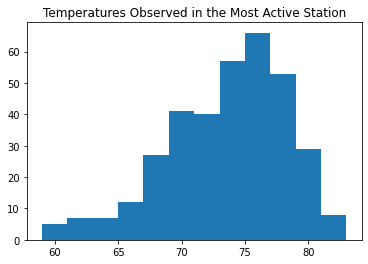

In [59]:
active_df = pd.DataFrame(active12mo)
active_df.head()
#plot active12mo data

plt.hist(active_df["tobs"], bins=12)
plt.title("Temperatures Observed in the Most Active Station")
plt.show()

## Bonus Challenge Assignment